## Redes Neurais Artificiais 2025.1

- **Disciplina**: Redes Neurais Artificiais 2025.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta segunda parte do Projeto Prático 2.2 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.

In [52]:
## Reservado para a importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay, confusion_matrix
import joblib
from joblib import Parallel, delayed
from itertools import product


In [53]:
# 1 - Abrindo a base de dados

df = pd.read_csv('covtype.csv')
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


In [54]:
# 2 - Removendo as colunas relacionadas aos atributos categóricos

atributos_categoricos = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
                        'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 
                        'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 
                        'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 
                        'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                        'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 
                        'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 
                        'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 
                        'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 
                        'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 
                        'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

df.drop(columns = atributos_categoricos, inplace = True)

In [55]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type'],
      dtype='object')

In [56]:
# 3 - Armazenando o atributo alvo em uma variável y 
# e os atributos preditores em uma variável X

X, y = df.drop(columns = 'Cover_Type'), df['Cover_Type']
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837
581008,2391,152,19,67,12,95,240,237,119,845
581009,2386,159,17,60,7,90,236,241,130,854
581010,2384,170,15,60,5,90,230,245,143,864


In [57]:
# 4 e 5 - Criação de uma função para efetuar uma partição holdout 70/30
# e realizar a Padronização dos conjuntos de treino e teste:

def holdout_partition (X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

    X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

    return X_train, X_test, y_train, y_test, X_train_std, X_test_std

In [58]:
X_train, X_test, y_train, y_test, X_train_std, X_test_std = holdout_partition(X, y)

c:\Users\proje\.conda\envs\env_test\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [ ]:
# 5 - Criação da rede neural MultiLayer Perceptron (MLP):

mlp = MLPClassifier(
    hidden_layer_sizes = (10,),     # 1 camada com 10 neurônios
    activation = 'relu',            # função de ativação ReLU
    solver = 'adam',                # solver Adam
    max_iter = 300,                 # 300 épocas
    verbose = True,                 # passo a passo do treinamento
)

In [ ]:
# Treinamento da rede neural MLP:

mlp.fit(X_train_std, y_train)

y_pred = mlp.predict(X_test_std)

In [ ]:
# 6 - Matriz de Confusão

fig, ax = plt.subplots(figsize = (8, 6))

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = ax, cmap = 'Greens')

ax.set_xlabel("Rótulos Preditos", fontsize = 10)
ax.set_ylabel("Rótulos Reais", fontsize = 10)

ax.tick_params(axis = 'both', labelsize = 8)

plt.show()

In [ ]:
# 6 - Acurácia, Precisão, Recall e F1-Score

metrics_data = {
    'Acurácia': [accuracy_score(y_test, y_pred)],
    'Precisão': [precision_score(y_test, y_pred, average = 'weighted', zero_division = 0)],
    'Recall': [recall_score(y_test, y_pred, average = 'weighted', zero_division = 0)],
    'F1-Score': [f1_score(y_test, y_pred, average = 'weighted', zero_division = 0)]
}

# Criar DataFrame e exibir em porcentagem
df_metricas = pd.DataFrame(metrics_data, index = ['MLP 1']).T * 100

# Formatar os valores para 2 casas decimais e adicionar '%'
df_metricas = df_metricas.applymap(lambda x: f"{x:.2f}%")

print(df_metricas)

In [ ]:
# 7 - Repetindo o treinamento da rede neural MLP anterior 100 vezes, com verbose = False :

accuracies = []
f1_scores = []

for i in range(100):
    X_train, X_test, y_train, y_test, X_train_std, y_test_std = holdout_partition(X, y)
    
    mlp = MLPClassifier(
    hidden_layer_sizes = (10,),     # 1 camada com 10 neurônios
    activation = 'relu',            # função de ativação ReLU
    solver = 'adam',                # solver Adam
    max_iter = 300,                 # 300 épocas
    verbose = False,                # sem passo a passo do treinamento
    )

    mlp.fit(X_train_std, y_train)
    y_pred = mlp.predict(X_train_std)
    
    accuracies.append(accuracy_score(y_train, y_pred))
    f1_scores.append(f1_score(y_train, y_pred, average = 'weighted', zero_division = 0))

In [ ]:
print("\nAdam (Treino)")
print(f"Acurácia - Média: {np.mean(accuracies):.4f}, Desvio Padrão: {np.std(accuracies):.4f}")
print(f"F1-Score - Média: {np.mean(f1_scores):.4f}, Desvio Padrão: {np.std(f1_scores):.4f}")

In [ ]:
# 8 - Repetindo o treinamento com solver = "sgd":

accuracies_sgd = []
f1_scores_sgd = []

for i in range(100):
    X_train, X_test, y_train, y_test, X_train_std, y_test_std = holdout_partition(X, y)
    
    mlp = MLPClassifier(
        hidden_layer_sizes = (10,),     # 1 camada com 10 neurônios
        activation = 'relu',            # função de ativação ReLU
        solver = 'sgd',                # solver Adam
        max_iter = 300,                 # 300 épocas
        verbose = False,                # sem passo a passo do treinamento
    )
    
    mlp.fit(X_train_std, y_train)
    y_pred = mlp.predict(X_train_std)

    accuracies_sgd.append(accuracy_score(y_train, y_pred))
    f1_scores_sgd.append(f1_score(y_train, y_pred, average = 'weighted', zero_division = 0))

In [ ]:
print("\nSGD (Treino)")
print(f"Acurácia - Média: {np.mean(accuracies_sgd):.4f}, Desvio Padrão: {np.std(accuracies_sgd):.4f}")
print(f"F1-Score - Média: {np.mean(f1_scores_sgd):.4f}, Desvio Padrão: {np.std(f1_scores_sgd):.4f}")

In [ ]:
if np.mean(accuracies) > np.mean(accuracies_sgd):
    print("\nAdam obteve melhor desempenho médio que SGD.")
else:
    print("\nSGD obteve melhor desempenho médio que Adam.")

# Diferença clara?
print(f"Diferença média de acurácia: {np.mean(accuracies) - np.mean(accuracies_sgd):.4f}")
print(f"Diferença média de F1-score: {np.mean(f1_scores) - np.mean(f1_scores_sgd):.4f}")

In [ ]:
print("Maior valor:", np.max(X))

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [ ]:
architectures = [(10,10), (16,4), (20,), (12,12), (20,20)]


functions = ['relu', 'logistic']

solvers = ['adam', 'sgd']

epochs = [100, 150, 200]

grid = list(product(architectures, functions, solvers, epochs))



In [ ]:
def get_top3(overall_averages):
    top3_acurracy = sorted(overall_averages, key= lambda av: (av[1], av[0]), reverse= True)[:3]

    print("\n\n\nTop 3 resultados com maior acurácia:")
    for i in range(len(top3_acurracy)):
        print(f"Top {i}: Modelo: {top3_acurracy[i][2]} Acurácia = {top3_acurracy[i][1]:.4f}, F1-Score = {top3_acurracy[i][0]:.4f} \n\n")
    return top3_acurracy

In [61]:
def training(X, y, model):
    X_train, X_test, y_train, y_test, X_train_std, X_test_std = holdout_partition(X, y)
    
    mlp = MLPClassifier(
        hidden_layer_sizes = model[0],
        activation = model[1],
        solver = model[2],
        max_iter = model[3],
        verbose = False
    )

    mlp.fit(X_train_std, y_train)
    y_pred = mlp.predict(X_test_std)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)



    return acc, f1, y_test, y_pred

In [ ]:
overall_averages=[]
model_metrics=[]


for j, model in enumerate(grid): 
    
    print("Iteracao", j)
    
    # Paralelização das 100 iterações para cada uma das arquiteturas
    resultados = Parallel(n_jobs=-1)( #resultados vai ser uma lista de 100 valores de acuracia e f1
        delayed(training)(X, y, model) for _ in range(100)
    )

    acc_from_100, f1_from_100, ytest_from_100, ypred_from_100 = zip(*resultados)
    model_metrics = [np.mean(f1_from_100), np.mean(acc_from_100), model]
    overall_averages.append(model_metrics)
    




Iteracao 0
Iteracao 1
Iteracao 2
Iteracao 3


In [116]:
top3_originals = get_top3(overall_averages)




Top 3 resultados com maior acurácia:
Top 0: Modelo: ((10, 10), 'relu', 'adam', 2) Acurácia = 0.6783, F1-Score = 0.6517 


Top 1: Modelo: ((16, 4), 'relu', 'adam', 2) Acurácia = 0.6497, F1-Score = 0.6027 


Top 2: Modelo: ((10, 10), 'relu', 'adam', 1) Acurácia = 0.5957, F1-Score = 0.5322 




## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_o$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

O valor de $N_i$ deve ser igual a quantidade de características de entrada do treinamento e o $N_0$ deve ser igual a quantidade de classes distintas, tedo em vista que este é um problema de classificação multiclasse. Assim:


In [64]:
n_i = df.shape[1]
n_i

11

In [65]:
n_0 = y.nunique()
n_0

7

In [66]:
alphas = [0.5, 2, 3]

In [67]:
def update_models_nh(alphas, models):
    new_models=[]

    for alpha in alphas:
        n_h = int(alpha * np.sqrt(n_i * n_0)) # Calcula o valor de N_h
        for model in models:
            list_model = list(model)
            list_model[0] = n_h
            new_models.append(list_model)
    return new_models


In [82]:
for g in grid:
    print(g)

((10, 10), 'relu', 'adam', 1)
((10, 10), 'relu', 'adam', 2)
((16, 4), 'relu', 'adam', 1)
((16, 4), 'relu', 'adam', 2)


In [ ]:
overall_averages_nh = []

new_models = update_models_nh(alphas, grid)
for j, model in enumerate(new_models):  
    
    print("\nInteração: ", j)
    # Paralelização das 100 iterações para cada uma das arquiteturas
    resultados_nh = Parallel(n_jobs=-1)(
        delayed(training)(X, y, model) for _ in range(100)
    )

    acc_from_100_nh, f1_from_100_nh, ytest_from_100_nh, ypred_from_100_nh = zip(*resultados_nh)

    nh_metrics = [np.mean(f1_from_100_nh), np.mean(acc_from_100_nh), model]
    overall_averages_nh.append(nh_metrics)


Interação:  0

Interação:  1

Interação:  2

Interação:  3

Interação:  4

Interação:  5

Interação:  6

Interação:  7

Interação:  8

Interação:  9

Interação:  10

Interação:  11


In [84]:
top3_nh = get_top3(overall_averages_nh)




Top 3 resultados com maior acurácia:
Top 0: Modelo: [26, 'relu', 'adam', 2] Acurácia = 0.6774, F1-Score = 0.6512 


Top 1: Modelo: [26, 'relu', 'adam', 2] Acurácia = 0.6712, F1-Score = 0.6410 


Top 2: Modelo: [17, 'relu', 'adam', 2] Acurácia = 0.6685, F1-Score = 0.6398 




## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [ ]:
top6=[] 

for model in top3_originals:
    top6.append(model)


for model in top3_nh:
    top6.append(model)

# for model in top6:
#     print(model)


[np.float64(0.6505357507593252), np.float64(0.675647145217551), ((10, 10), 'relu', 'adam', 2)]
[np.float64(0.6109883943843608), np.float64(0.6455653628143933), ((10, 10), 'relu', 'adam', 1)]
[np.float64(0.5175697090559589), np.float64(0.6015123003488159), ((16, 4), 'relu', 'adam', 2)]
[np.float64(0.6511561201462552), np.float64(0.6773732960804112), [26, 'relu', 'adam', 2]]
[np.float64(0.6410281072044925), np.float64(0.6711671849183036), [26, 'relu', 'adam', 2]]
[np.float64(0.6397714998249309), np.float64(0.6685058862676703), [17, 'relu', 'adam', 2]]


In [88]:
# Obter os dados sem os valores excluidos anteriormente
new_df = pd.read_csv('covtype.csv')
new_X, new_y = new_df.drop(columns = 'Cover_Type'), df['Cover_Type']

In [ ]:
# Nova funcao de teste com a variável max_iter predefinida para todos como 200

def training_geometric_pyamid(X, y, model):
    X = np.nan_to_num(X, nan=0.0, posinf=np.finfo(np.float64).max, neginf=np.finfo(np.float64).min)
    X_train, X_test, y_train, y_test, X_train_std, X_test_std = holdout_partition(X, y)
    
    mlp = MLPClassifier(
        hidden_layer_sizes = model[0],
        activation = model[1],
        solver = model[2],
        max_iter = 2,
        verbose = False
    )

    mlp.fit(X_train_std, y_train)
    y_pred = mlp.predict(X_test_std)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return acc, f1

In [ ]:
new_medias_gerais=[]
dados_boxplot = []

for i, model_conf in enumerate(top6):

    print("Iteracao ", i)

    new_resultados = Parallel(n_jobs=-1)(
        delayed(training_geometric_pyamid)(new_X, new_y, model_conf[2]) for _ in range (100)
    )

    

    new_acuracias_i, new_f1scores_i = zip(*new_resultados)
    dados_boxplot.append(list(new_f1scores_i))

    new_resultados_arq = (np.mean(new_acuracias_i), np.mean(new_f1scores_i), i)
    new_medias_gerais.append(new_resultados_arq)

    print(f"\n\nARQUITETURA {i} Configuração: {model_conf[2]} Acuracia: {np.mean(new_acuracias_i):.4f} +- {np.std(new_acuracias_i):.4f} F1-Score: {np.mean(new_f1scores_i):.4f} +- {np.std(new_f1scores_i):.4f}\n")


Iteracao  0


ARQUITETURA 0 Camadas: ((10, 10), 'relu', 'adam', 2) Acuracia: 0.6957 +- 0.0033 F1-Score: 0.6731 +- 0.0037

Iteracao  1


ARQUITETURA 1 Camadas: ((10, 10), 'relu', 'adam', 1) Acuracia: 0.6962 +- 0.0038 F1-Score: 0.6716 +- 0.0064

Iteracao  2


ARQUITETURA 2 Camadas: ((16, 4), 'relu', 'adam', 2) Acuracia: 0.6791 +- 0.0514 F1-Score: 0.6408 +- 0.0897

Iteracao  3


ARQUITETURA 3 Camadas: [26, 'relu', 'adam', 2] Acuracia: 0.6938 +- 0.0032 F1-Score: 0.6678 +- 0.0046

Iteracao  4


ARQUITETURA 4 Camadas: [26, 'relu', 'adam', 2] Acuracia: 0.6949 +- 0.0035 F1-Score: 0.6693 +- 0.0043

Iteracao  5


ARQUITETURA 5 Camadas: [17, 'relu', 'adam', 2] Acuracia: 0.6887 +- 0.0030 F1-Score: 0.6591 +- 0.0042



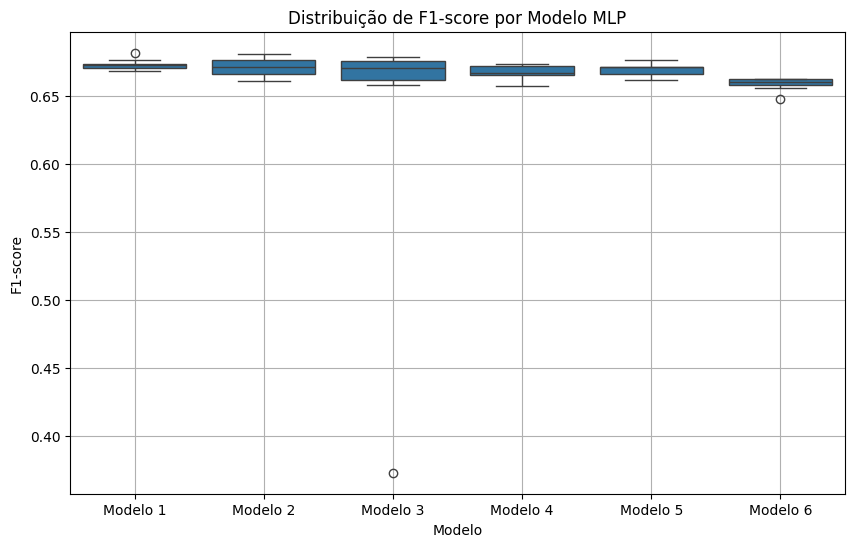

In [93]:


# Transformar em DataFrame longo
data = []
for i, sublist in enumerate(dados_boxplot):
    for score in sublist:
        data.append({'Modelo': f'Modelo {i+1}', 'F1-score': score})

dft = pd.DataFrame(data)

# Criar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dft, x='Modelo', y='F1-score')
plt.title('Distribuição de F1-score por Modelo MLP')
plt.grid(True)
plt.show()


## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?